### Thera Bank Personal Loan Campaign
 
### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

### Domain:
Banking

 

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer in 1000
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (in 1000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (1000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?
 

### Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 

### Steps and tasks:
- Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

- EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

- Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

- Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the - metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

- Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

- Give conclusion related to the Business understanding of your model? (5 marks)

**============================================================================================================**
**============================================================================================================**


**Import Libraries and import data**
- shape
- stats summary
- info
- null value
- incorrect imputation if any


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
df.shape


(5000, 14)

**Insights**
- There are 5000 records spanning across 14 columns

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Insights**
- Average income is 74K 
- Experience has invalid entries in negative - candidate for imputing.
- Customers applied for Personal Loan stand around 0.096 * 5000 = 500(approx). 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Insights**
- Data types for most features are integer. 
- CCAvg is only float. 
- There is no missing values across features

In [7]:

# Replacing experience -1, -2 and -3 to unified one value (-1)
df['Experience'] = df['Experience'].replace([-1,-2,-3],-1)


# Imputing the negative Experience with median experience.
rep_0 = SimpleImputer(missing_values=-1, strategy="median")
cols=['Experience']
imputer = rep_0.fit(df[cols])
df[cols] = imputer.transform(df[cols])



df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Insights**
- Imputed negative experience with the median value for experience columns

In [8]:
df.isnull().values.any()

False

**Insights**
- There is no null values in the dataframe


In [9]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [10]:
# Number of unique in each column?
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Insights**
- Credit card , Online, CD Account, Personal Loan, Securities Account  - binary values. 
- Education has three category
- ID has 5000 unique values - proves no duplicates. 

In [11]:
# Number of people with zero mortgage?
df[df['Mortgage']>0].count()

ID                    1538
Age                   1538
Experience            1538
Income                1538
ZIP Code              1538
Family                1538
CCAvg                 1538
Education             1538
Mortgage              1538
Personal Loan         1538
Securities Account    1538
CD Account            1538
Online                1538
CreditCard            1538
dtype: int64

**Insights**
- There are 1538 customers with Zero Mortage 

In [12]:
# Number of people with zero credit card spending per month?
df[df['CCAvg']==0].count()

ID                    106
Age                   106
Experience            106
Income                106
ZIP Code              106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
dtype: int64

**Insight**
- There are 106 customers who have zero cerdit card spending.

In [13]:
for cat in ['ZIP Code','Age','Experience','Family']:
    print("+"*100)
    print("%s - Categorical Value Count"%cat)
    print("+"*100)
    print(df[cat].value_counts())

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ZIP Code - Categorical Value Count
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Age - Categorical Value Count
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    

**Insights** 
- Age - customer with age of 35 is major group in the bank.
- Experience - Experience of 20 years is mode of customer experience. 
- Family - There are four category in Family feature. 

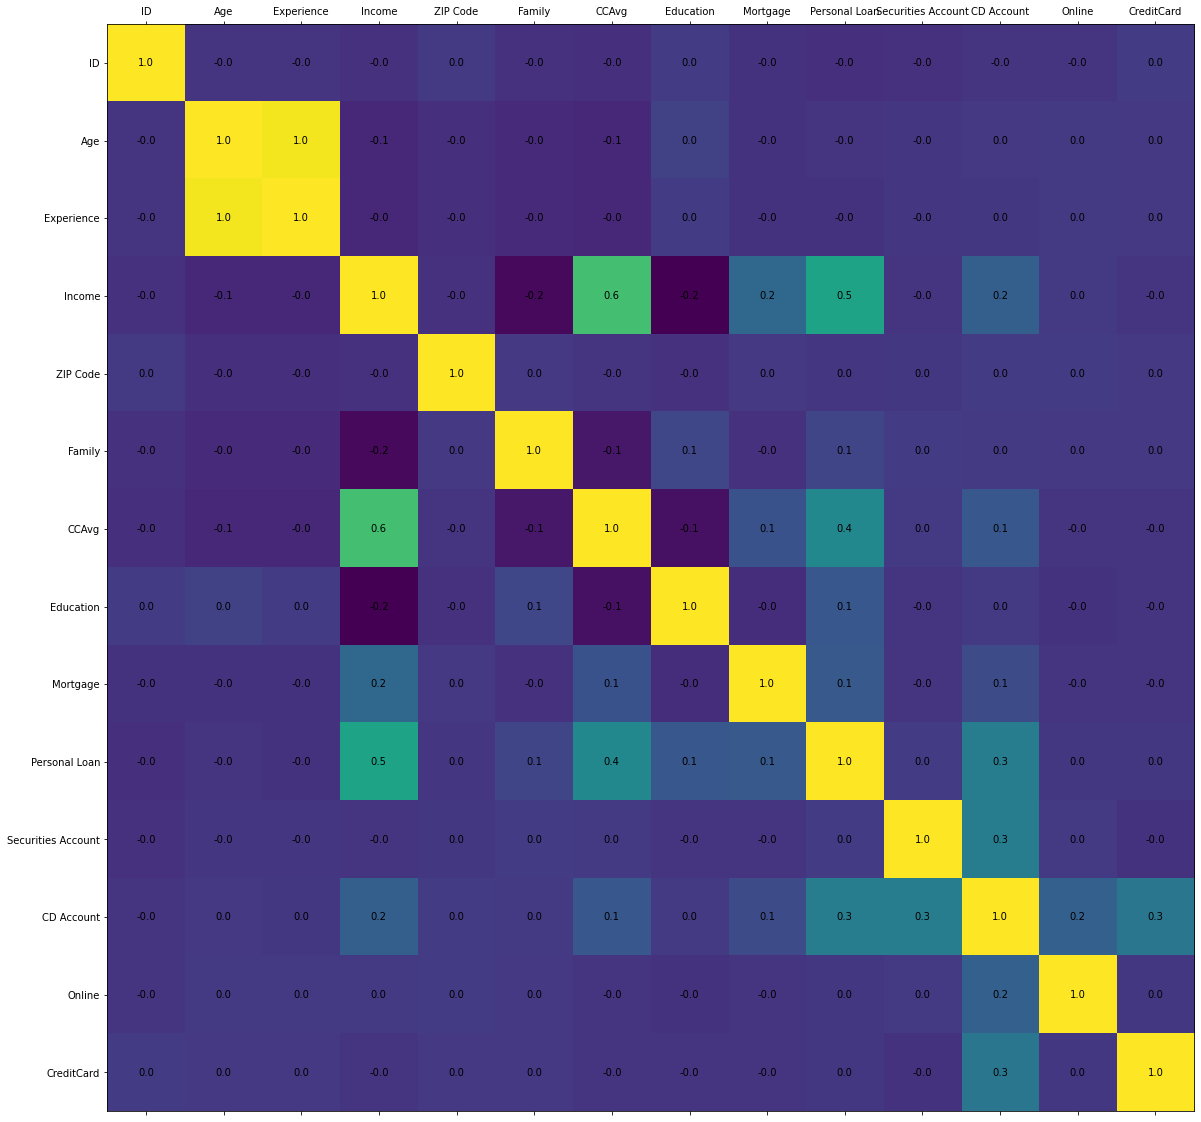

In [14]:
#Bivariate

def plot_corr(df, size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plot_corr(df)

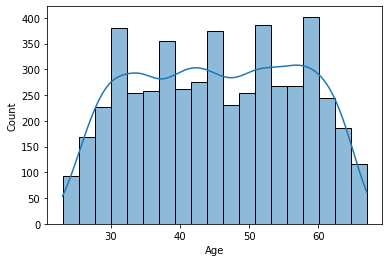

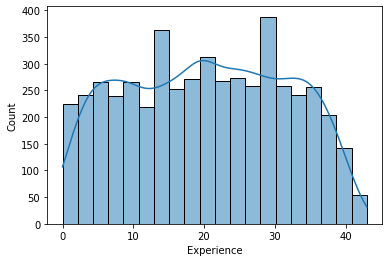

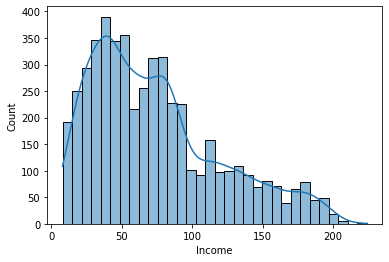

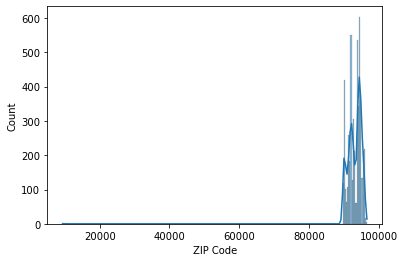

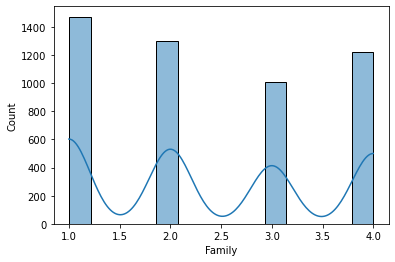

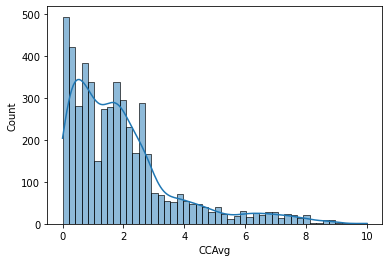

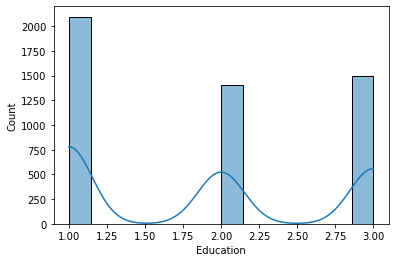

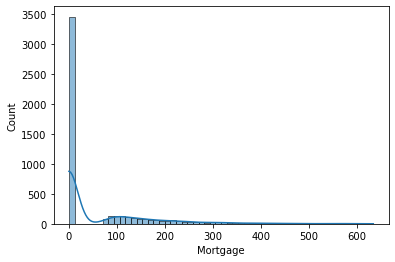

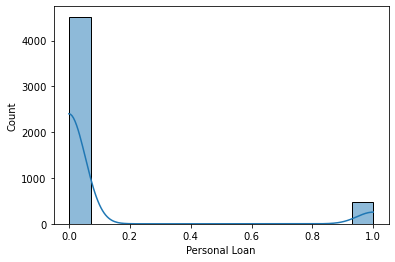

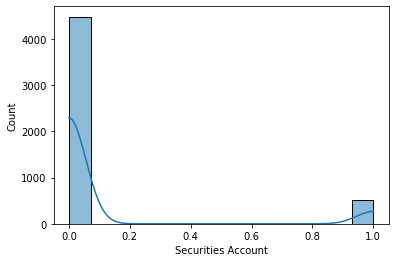

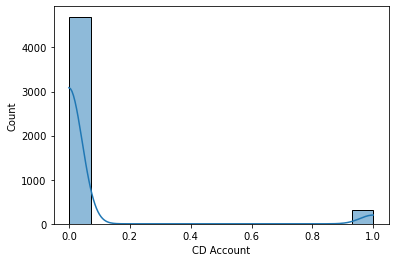

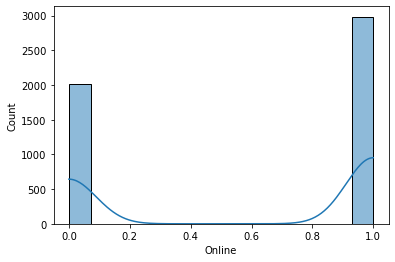

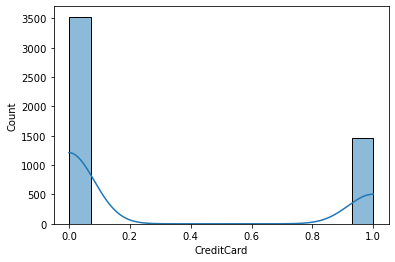

In [15]:
# Univariate Analysis
for col in ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']:
    sns.histplot(df[col],kde=True)
    plt.show()

**============================================================================================================**

**ASK**
<font color='orange'>
 - Split the data into training and test set in the ratio of 70:30 respectively 
    </font>

In [16]:


# Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
X = df.drop(['Personal Loan','ID'],axis=1)
Y = df['Personal Loan']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 2015 to 2915
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3500 non-null   int64  
 1   Experience          3500 non-null   float64
 2   Income              3500 non-null   int64  
 3   ZIP Code            3500 non-null   int64  
 4   Family              3500 non-null   int64  
 5   CCAvg               3500 non-null   float64
 6   Education           3500 non-null   int64  
 7   Mortgage            3500 non-null   int64  
 8   Securities Account  3500 non-null   int64  
 9   CD Account          3500 non-null   int64  
 10  Online              3500 non-null   int64  
 11  CreditCard          3500 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 355.5 KB


**Insights**
- Training data has 3500 entries(70%)
- Testing data has 1500 entries(30%)

**============================================================================================================**

**ASK**
<font color='orange'>
- Use the Logistic Regression model to predict whether the customer will agree a personal loan or not. 
- Print all the - metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score).
- Draw a heatmap to display confusion matrix 
 </font>

In [18]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [19]:
y_predict = model.predict(x_test)


<AxesSubplot:>

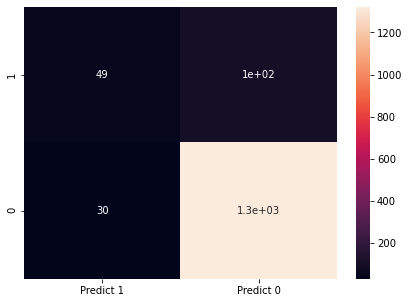

In [20]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

**The confusion matrix**

- True Positives (TP): we correctly predicted that they do have diabetes 46

- True Negatives (TN): we correctly predicted that they don't have diabetes 1300

- False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 33 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 100 Falsely predict negative Type II error

In [21]:
dir(metrics)
params=['accuracy_score','metrics.auc','recall_score','precision_score','f1_score','roc_auc_score']
# for param in params:
#     print('+'*40,param,'+'*40)
#     calculated=locals()[param](y_test,y_predict)
#     print("%s - calculated - %s"%(param,calculated))
        
print('+'*40,'accuracy_score','+'*40)
calculated=metrics.accuracy_score(y_test,y_predict)
print("accuracy_score - calculated - %s"%(calculated))

print('+'*40,'precision_score','+'*40)
calculated=metrics.precision_score(y_test,y_predict)
print("precision_score - calculated - %s"%(calculated))

print('+'*40,'recall_score','+'*40)
calculated=metrics.recall_score(y_test,y_predict)
print("recall_score - calculated - %s"%(calculated))

print('+'*40,'f1_score','+'*40)
calculated=metrics.f1_score(y_test,y_predict)
print("f1_score - calculated - %s"%(calculated))

print('+'*40,'roc_auc_score','+'*40)
calculated=metrics.roc_auc_score(y_test,y_predict)
print("roc_auc_score - calculated - %s"%(calculated))

++++++++++++++++++++++++++++++++++++++++ accuracy_score ++++++++++++++++++++++++++++++++++++++++
accuracy_score - calculated - 0.9133333333333333
++++++++++++++++++++++++++++++++++++++++ precision_score ++++++++++++++++++++++++++++++++++++++++
precision_score - calculated - 0.620253164556962
++++++++++++++++++++++++++++++++++++++++ recall_score ++++++++++++++++++++++++++++++++++++++++
recall_score - calculated - 0.3288590604026846
++++++++++++++++++++++++++++++++++++++++ f1_score ++++++++++++++++++++++++++++++++++++++++
f1_score - calculated - 0.4298245614035088
++++++++++++++++++++++++++++++++++++++++ roc_auc_score ++++++++++++++++++++++++++++++++++++++++
roc_auc_score - calculated - 0.6533266434507872


**Insights**
- Accuracy looks good with 91%
- Recall : False Negative impacts Recall and it stands at 30.8% 
- Precision: False Postive nears True Postive, hence percision stands 50%
- F1_Score: determined from recall and precision stands at 40%. This gives prediction is just 40% efficient
- 

**============================================================================================================**


**ASK**
<font color='orange'>
- Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. 
</font>


In [22]:
# Feature Importance
fi = pd.DataFrame()
fi['col'] = x_train.columns
fi['coeff'] = np.round(model.coef_[0],5)
fi.sort_values('coeff',ascending=False)

,col,coeff
6,Education,0.04726
4,Family,0.04360
2,Income,0.03479
5,CCAvg,0.02056
9,CD Account,0.01436
0,Age,0.01284
8,Securities Account,0.00354
7,Mortgage,0.00075
11,CreditCard,0.00047
10,Online,0.00027


**Insights:** 
<font color='green'>
- Income is the important feature for determining the output with co-efficiency of 0.4
- Education, Family are second and third with co-efficiency of 0.017 and 0.015 respectively
</font>    
- ZIP Code, Age and Experience are least important feature in determining the output. 


In [23]:

# Creating a dataframe to compare expected and observed as one. 

z = x_test.copy()
z['Personal_Loan_Predicted'] = y_predict
z['Personal_Loan_Actual'] = y_test

In [24]:
z.groupby('Personal_Loan_Predicted')['Personal_Loan_Actual'].value_counts()

Personal_Loan_Predicted  Personal_Loan_Actual
0                        0                       1321
                         1                        100
1                        1                         49
                         0                         30
Name: Personal_Loan_Actual, dtype: int64

**Insights:**
- 1. When a customer predicted to accept loan (1), there are 33 instances customer does not accepted the loan(0).
- 2. When a customer predicted not to accept loan (0), there are 103 instances customer accepted the loan(1).

**============================================================================================================**

**ASK:**

-- Give conclusion related to the Business understanding of your model?

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that customer will accept the personal loan and the customer was not accepted personal loan

*False Positive (observed=0,predicted=1):*

Predicted that customer will accept the personal loan and the customer was not accepted the personal loan

*True Negative (observed=0,predicted=0):*

Predicted that customer will not accept the personal loan and the customer was not accepted the personal loan.

*False Negative (observed=1,predicted=0):*

Predicted that customer will not accept the personal loan  and the customer was accepted the personal loan

##### `Important Features`

"Education", "Family", "Income", "CCAvg", "CD Account"

seems to be top 5 features which influence the model's output. Based on the coefficients value.

"Experience", "Online", "CreditCard", 'Mortgage' and "ZIP code"

have coefficients value as 0 or less so these feature doesn't help model in predicting target variable.


##### `Important Metric`

- Thera Bank wants customers to accept the personal loan offered to them. i.e **less number of false Negative**. If False Negative is high, banks prediction about customer accepting personal loan is wrong. Hence **Recall is the important Metric**. 

- In case of False positive, bank offered loan for more person though customer not accepting is still agreeable. 

##### `Plan to Future Campaign`
<font color='green'>
If we run targetted campaign based on Education , Family and Income (top three important features), the customers accepting personal loan will increase.  
</font>


**============================================================================================================**
**============================================================================================================**